In [7]:
import numpy as np 
import pandas as pd

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [9]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [10]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[2304]),
     layers.Dense(128,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 2304)              9216      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               295040    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 305671 (1.17 MB)
Trainable params: 30080

Epoch 1/500
718/718 [==============================] - 6s 6ms/step - loss: 1.9089 - accuracy: 0.2806 - val_loss: 1.6356 - val_accuracy: 0.3612
Epoch 2/500
718/718 [==============================] - 5s 7ms/step - loss: 1.6805 - accuracy: 0.3378 - val_loss: 1.6100 - val_accuracy: 0.3628
Epoch 3/500
718/718 [==============================] - 5s 7ms/step - loss: 1.6382 - accuracy: 0.3562 - val_loss: 1.6008 - val_accuracy: 0.3706
Epoch 4/500
718/718 [==============================] - 5s 6ms/step - loss: 1.6233 - accuracy: 0.3600 - val_loss: 1.5893 - val_accuracy: 0.3795
Epoch 5/500
718/718 [==============================] - 4s 6ms/step - loss: 1.6096 - accuracy: 0.3694 - val_loss: 1.5787 - val_accuracy: 0.3819
Epoch 6/500
718/718 [==============================] - 4s 6ms/step - loss: 1.6014 - accuracy: 0.3740 - val_loss: 1.5843 - val_accuracy: 0.3851
Epoch 7/500
718/718 [==============================] - 4s 6ms/step - loss: 1.5907 - accuracy: 0.3778 - val_loss: 1.5644 - val_accuracy: 0.3927

<Axes: >

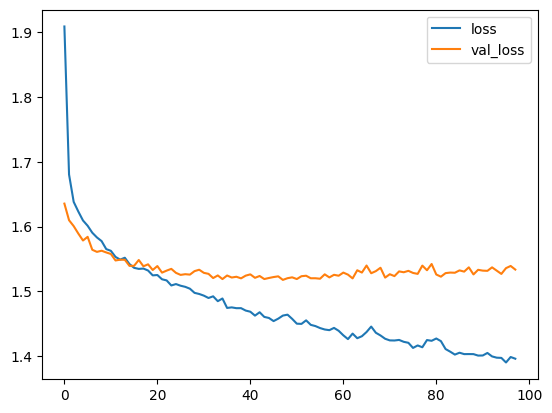

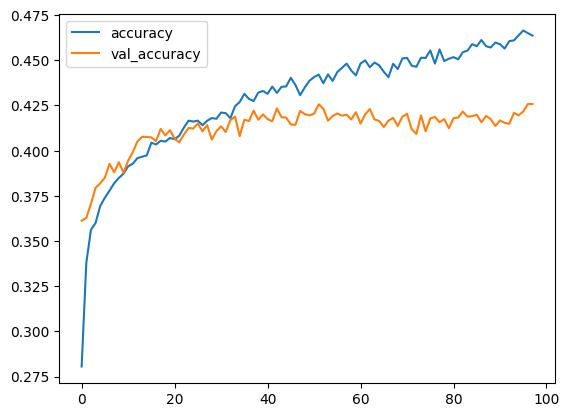

In [11]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=500,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()